In [1]:
import numpy as np
import pprint
import sys 
import gym
from lib.envs.frozen_lake import RewardingFrozenLakeEnv
from lib.solvers import PolicyIterationSolver, ValueIterationSolver
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

In [3]:
def plot_policy_map(title, policy, map_desc, color_map, direction_map, size):
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(111, xlim=(0, policy.shape[1]), ylim=(0, policy.shape[0]))
    font_size = 'x-large'
    if policy.shape[1] > 16:
        font_size = 'small'
    plt.title(title)
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            y = policy.shape[0] - i - 1
            x = j
            p = plt.Rectangle([x, y], 1, 1)
            p.set_facecolor(color_map[map_desc[i, j]])
            ax.add_patch(p)

            text = ax.text(x+0.5, y+0.5, direction_map[policy[i, j]], weight='bold', size=font_size,
                           horizontalalignment='center', verticalalignment='center', color='w')
            text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'),
                                   path_effects.Normal()])

    plt.axis('off')
    plt.xlim((0, policy.shape[1]))
    plt.ylim((0, policy.shape[0]))
    plt.tight_layout()

    return plt

def plot_value_map(title, v, map_desc, color_map, size):
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(111, xlim=(0, v.shape[1]), ylim=(0, v.shape[0]))
    font_size = 'x-large'
    if v.shape[1] > 16:
        font_size = 'small'

    v_min = np.min(v)
    v_max = np.max(v)
    bins = np.linspace(v_min, v_max, 100)
    v_red = np.digitize(v, bins)/100.0
    for i in range(v.shape[0]):
        for j in range(v.shape[1]):
            value = np.round(v[i, j], 2)
            if len(str(value)) > 4:
                font_size = 'small'

    plt.title(title)
    for i in range(v.shape[0]):
        for j in range(v.shape[1]):
            y = v.shape[0] - i - 1
            x = j
            p = plt.Rectangle([x, y], 1, 1)
            p.set_facecolor(color_map[map_desc[i, j]])
            ax.add_patch(p)

            value = np.round(v[i, j], 2)

            red = v_red[i, j]
            text2 = ax.text(x+0.5, y+0.5, value, size=font_size,
                            horizontalalignment='center', verticalalignment='center', color=(1.0, 1.0-red, 1.0-red))
            text2.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                                   path_effects.Normal()])

    plt.axis('off')
    plt.xlim((0, v.shape[1]))
    plt.ylim((0, v.shape[0]))
    plt.tight_layout()

    return plt

In [4]:
reward_smallPolicyIterationIters = []
reward_smallPolicyIterationTime = []
reward_largePolicyIterationIters = []
reward_largePolicyIterationTime = []
for p in np.around(np.linspace(0, 1, 21), decimals=2):
    
    smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p,  map_name="4x4")
    solver_1 = PolicyIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=1)
    solver_1.run_until_converged()
    reward_smallPolicyIterationTime.append(sum(solver_1._step_times))
    reward_smallPolicyIterationIters.append(solver_1._steps)
    
    largeRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p, map_name="20x20")
    solver_2 = PolicyIterationSolver(largeRewardingFrozenLakeEnv, discount_factor=1)
    solver_2.run_until_converged()
    reward_largePolicyIterationTime.append(sum(solver_2._step_times))
    reward_largePolicyIterationIters.append(solver_2._steps)

    print("done with p=" + str(p))
    

done with p=0.0
done with p=0.05
done with p=0.1
done with p=0.15
done with p=0.2
done with p=0.25
done with p=0.3
done with p=0.35
done with p=0.4
done with p=0.45
done with p=0.5
done with p=0.55
done with p=0.6
done with p=0.65
done with p=0.7
done with p=0.75
done with p=0.8
done with p=0.85
done with p=0.9
done with p=0.95
done with p=1.0


In [5]:
discount_smallPolicyIterationEvalTime = []
discount_smallPolicyIterationIterations = []
discount_largePolicyIterationEvalTime = []
discount_largePolicyIterationIterations = []
for p in np.around(np.linspace(0, 1, 21), decimals=2):
    
    smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p, map_name="4x4", step_reward=0)
    solver_1 = PolicyIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=.9)
    solver_1.run_until_converged()
    discount_smallPolicyIterationEvalTime.append(sum(solver_1._step_times))
    discount_smallPolicyIterationIterations.append(solver_1._steps)
    
    largeRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p, map_name="20x20", step_reward=0)
    solver_2 = PolicyIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=.9)
    solver_2.run_until_converged()
    discount_largePolicyIterationEvalTime.append(sum(solver_2._step_times))
    discount_largePolicyIterationIterations.append(solver_2._steps)
    print("Done with p=" + str(p))

Done with p=0.0
Done with p=0.05
Done with p=0.1
Done with p=0.15
Done with p=0.2
Done with p=0.25
Done with p=0.3
Done with p=0.35
Done with p=0.4
Done with p=0.45
Done with p=0.5
Done with p=0.55
Done with p=0.6
Done with p=0.65
Done with p=0.7
Done with p=0.75
Done with p=0.8
Done with p=0.85
Done with p=0.9
Done with p=0.95
Done with p=1.0


In [6]:
reward_smallValueIterationEvalTime = []
reward_smallValueIterationIterations = []
reward_largeValueIterationEvalTime = []
reward_largeValueIterationtIterations = []
for p in np.around(np.linspace(0, 1, 21), decimals=2):
    
    smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p, map_name="4x4")
    solver_1 = ValueIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=1)
    solver_1.run_until_converged()
    reward_smallValueIterationEvalTime.append(sum(solver_1._step_times))
    reward_smallValueIterationIterations.append(solver_1._steps)
    
    largeRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p, map_name="20x20")
    solver_2 = ValueIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=1)
    solver_2.run_until_converged()
    
    reward_largeValueIterationEvalTime.append(sum(solver_2._step_times))
    reward_largeValueIterationtIterations.append(solver_2._steps)
    
    print("Done with p=" + str(p))

Done with p=0.0
Done with p=0.05
Done with p=0.1
Done with p=0.15
Done with p=0.2
Done with p=0.25
Done with p=0.3
Done with p=0.35
Done with p=0.4
Done with p=0.45
Done with p=0.5
Done with p=0.55
Done with p=0.6
Done with p=0.65
Done with p=0.7
Done with p=0.75
Done with p=0.8
Done with p=0.85
Done with p=0.9
Done with p=0.95
Done with p=1.0


In [7]:
discount_smallValueIterationEvalTime = []
discount_smallValueIterationIterations = []
discount_largeValueIterationEvalTime = []
discount_largeValueIterationtIterations = []
for p in np.around(np.linspace(0, 1, 21), decimals=2):
    
    smallRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p, map_name="4x4", step_reward=0)
    solver_1 = ValueIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=.9)
    solver_1.run_until_converged()
    discount_smallValueIterationEvalTime.append(sum(solver_1._step_times))
    discount_smallValueIterationIterations.append(solver_1._steps)
    
    largeRewardingFrozenLakeEnv = RewardingFrozenLakeEnv(transition_prob=p, map_name="20x20", step_reward=0)
    solver_2 = ValueIterationSolver(smallRewardingFrozenLakeEnv, discount_factor=.9)
    solver_2.run_until_converged()
    discount_largeValueIterationEvalTime.append(sum(solver_2._step_times))
    discount_largeValueIterationtIterations.append(solver_2._steps)
    
    print("Done with p=" + str(p))

Done with p=0.0
Done with p=0.05
Done with p=0.1
Done with p=0.15
Done with p=0.2
Done with p=0.25
Done with p=0.3
Done with p=0.35
Done with p=0.4
Done with p=0.45
Done with p=0.5
Done with p=0.55
Done with p=0.6
Done with p=0.65
Done with p=0.7
Done with p=0.75
Done with p=0.8
Done with p=0.85
Done with p=0.9
Done with p=0.95
Done with p=1.0


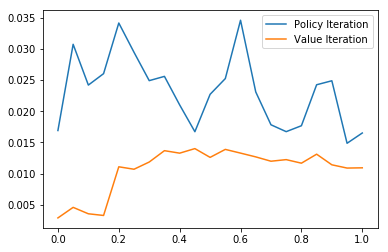

In [13]:
plt.plot(np.linspace(0, 1, 21), discount_smallPolicyIterationEvalTime)
plt.plot(np.linspace(0, 1, 21), discount_smallValueIterationEvalTime)
plt.legend(["Policy Iteration", "Value Iteration"])

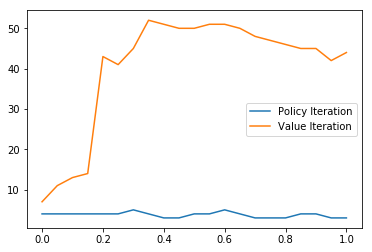

In [14]:
plt.plot(np.linspace(0, 1, 21), discount_smallPolicyIterationIterations)
plt.plot(np.linspace(0, 1, 21), discount_smallValueIterationIterations)
plt.legend(["Policy Iteration", "Value Iteration"])

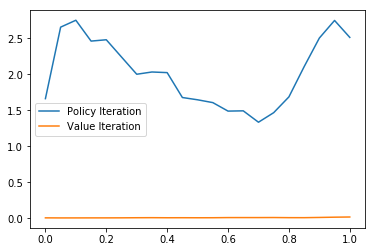

In [18]:
plt.plot(np.linspace(0, 1, 21), reward_largePolicyIterationTime)
plt.plot(np.linspace(0, 1, 21), reward_largeValueIterationEvalTime)
plt.legend(["Policy Iteration", "Value Iteration"])

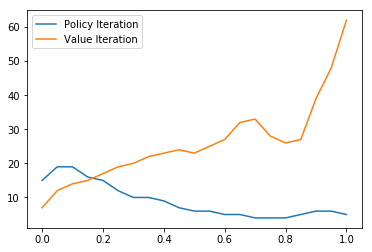

In [19]:
plt.plot(np.linspace(0, 1, 21), reward_largePolicyIterationIters)
plt.plot(np.linspace(0, 1, 21), reward_largeValueIterationtIterations)
plt.legend(["Policy Iteration", "Value Iteration"])

In [ ]:
testEnv = RewardingFrozenLakeEnv(transition_prob=.2, map_name="20x20")
policy, V, eval_time, iterations, _ = lib.algorithms.policy_improvement(testEnv, discount_factor=.9)

In [ ]:
f = np.array([np.where(r==1)[0][0] for r in policy]).reshape(20, 20)

In [ ]:
plot_policy_map("fuck", f, testEnv.desc, testEnv.colors(), testEnv.directions(), (10, 10))

In [ ]:
testEnv = RewardingFrozenLakeEnv(transition_prob=.8, map_name="20x20", goal_reward=10)
policy, V, eval_time, iterations = lib.algorithms.value_iteration(testEnv, discount_factor=.5)

In [ ]:
f = np.array([np.where(r==1)[0][0] for r in policy]).reshape(20, 20)

In [ ]:
plot_value_map("fuck", V.reshape(20, 20), testEnv.desc, testEnv.colors(), (10, 10))